## Import Library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_colwidth', None)  # Show full content in each cell
pd.set_option('display.width', 1000)  # Set max width

## Import dataset

In [2]:
dataset_path = os.getcwd().replace('/notebook' , '') + "/dataset/"

# Read training data
imu_df = pd.read_csv(dataset_path + "imu_data.csv")
imu_df = imu_df.iloc[:,1:]
imu_df.columns = imu_df.columns.str.replace("'" , "")

# Feature Selection

Activity Mapper:

0 : walking
1 : jogging
2 : upstairs
3 : downstairs
4 : sitting
5 : standing
6 : sleeping

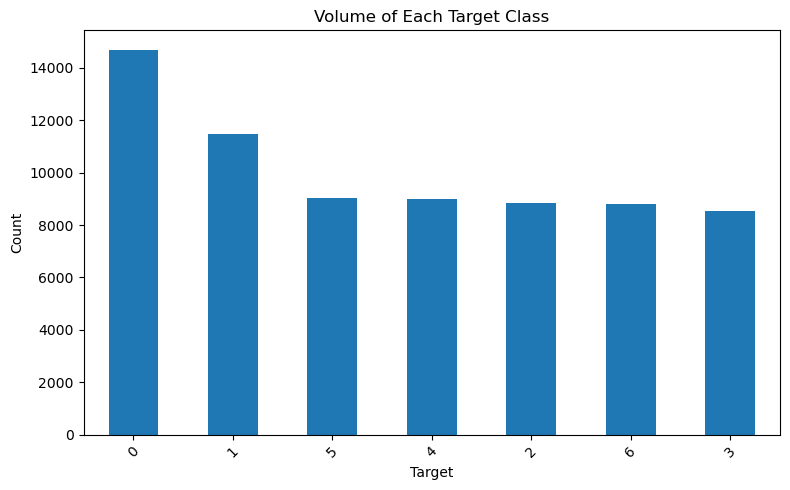

In [33]:
target_counts = imu_df['Target'].value_counts()
target_counts.plot(kind='bar', figsize=(8, 5))

plt.title('Volume of Each Target Class')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Correlation Matrix

## IMU Data

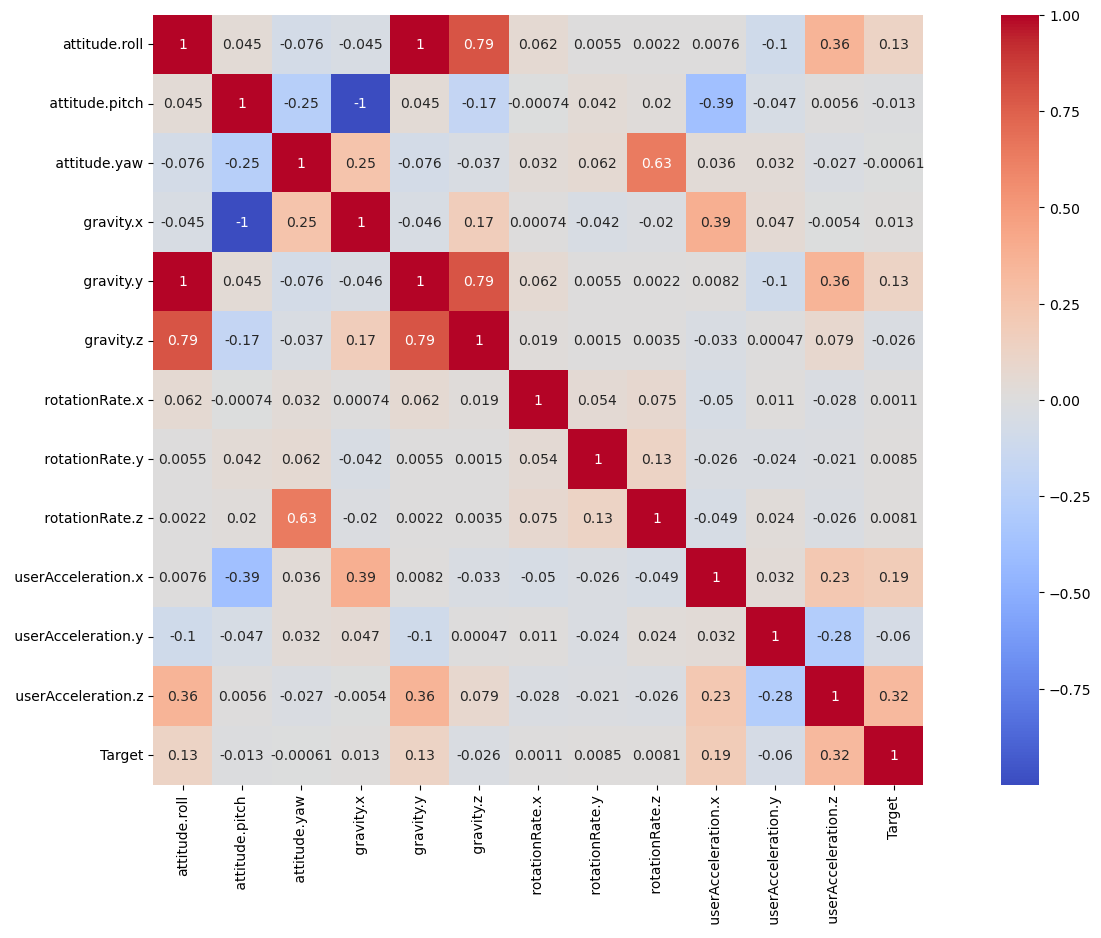

In [3]:
plt.figure(figsize = (20,10))

imu_corr = imu_df.corr()

axis_corr = sns.heatmap(imu_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [4]:
target_corr = imu_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.z    0.320340
 userAcceleration.x    0.189834
 gravity.y             0.129080
attitude.roll          0.127887
 userAcceleration.y    0.060010
 gravity.z             0.025733
 gravity.x             0.012898
 attitude.pitch        0.012647
 rotationRate.y        0.008461
 rotationRate.z        0.008071
 rotationRate.x        0.001080
 attitude.yaw          0.000612
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.x , acceleration.z]

## Motion EDA

In [5]:
"""
Map
0 - steady motion,
1 - unsteady motion
"""
mapper = {
    0 : 1,
    1 : 1,
    2 : 1,
    3 : 1,
    4 : 0,
    5 : 0,
    6 : 0
}

In [6]:
motion_df = imu_df.copy()
motion_df['Target'] = motion_df['Target'].map(mapper)

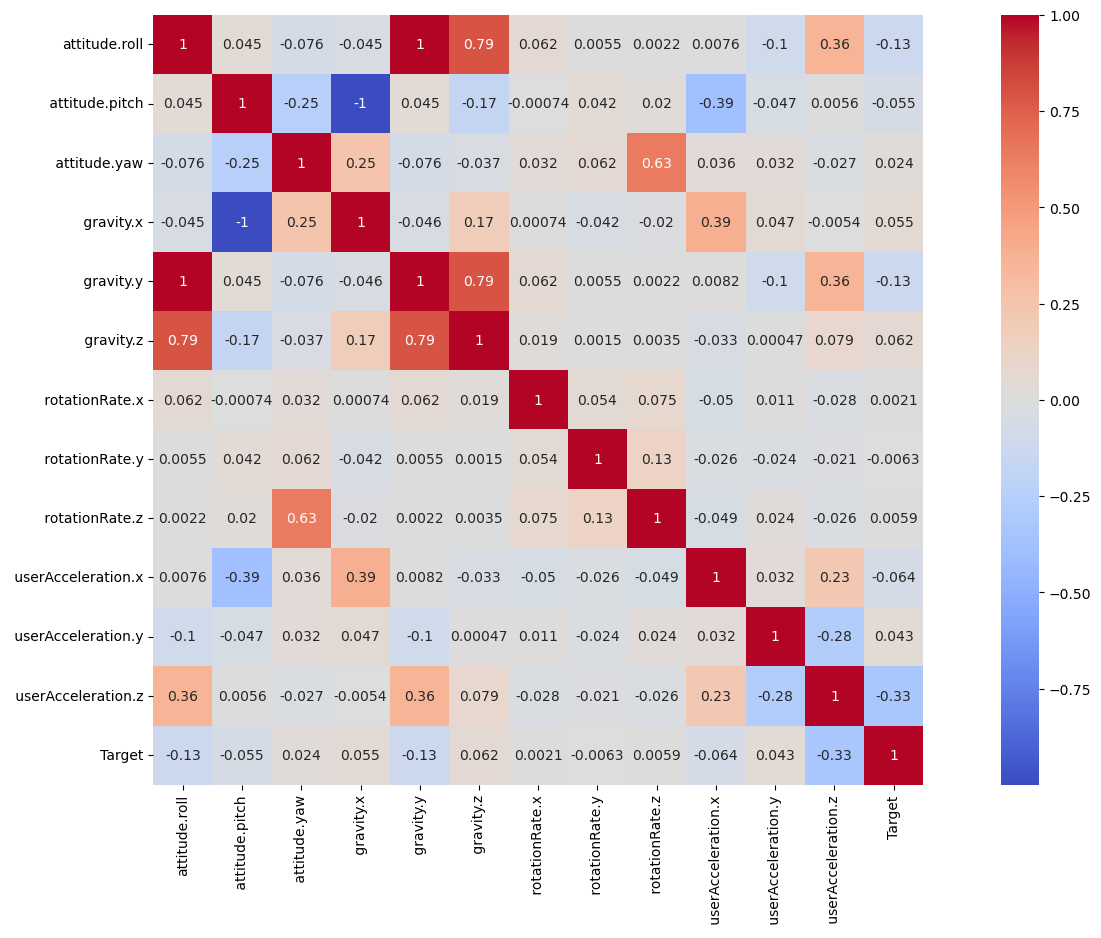

In [7]:
plt.figure(figsize = (20,10))

motion_corr = motion_df.corr()

axis_corr = sns.heatmap(motion_corr, annot= True,cmap="coolwarm",square=True)

plt.show()


In [8]:
target_corr = motion_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.z    0.332658
 gravity.y             0.128140
attitude.roll          0.126740
 userAcceleration.x    0.064340
 gravity.z             0.062364
 attitude.pitch        0.054731
 gravity.x             0.054523
 userAcceleration.y    0.042966
 attitude.yaw          0.024040
 rotationRate.y        0.006325
 rotationRate.z        0.005911
 rotationRate.x        0.002071
Name: Target, dtype: float64


Important Features = [attitude.roll , gravity.y , acceleration.z]

## Steady Motion

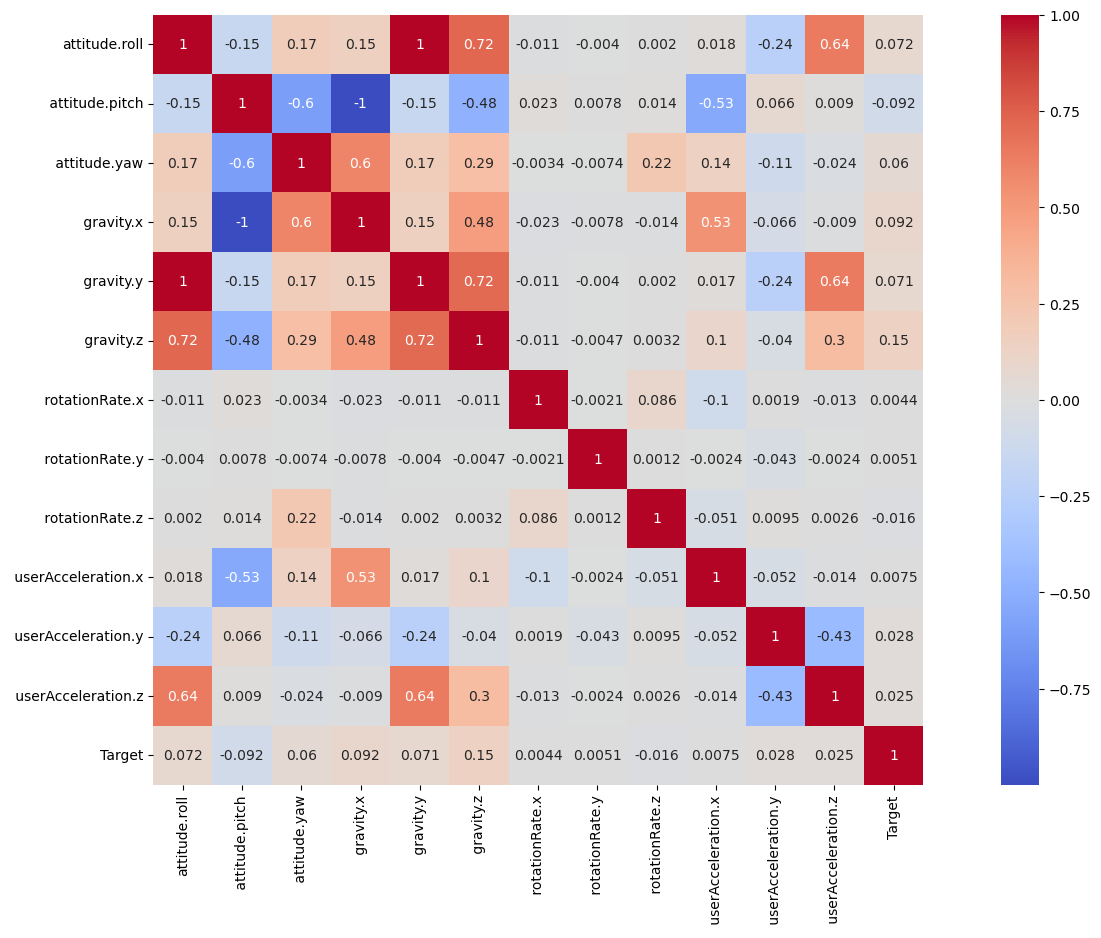

In [9]:
steady_df  =imu_df[(imu_df['Target'] == 4) | (imu_df['Target'] == 5) | (imu_df['Target'] == 6)]

plt.figure(figsize = (20,10))

steady_corr = steady_df.corr()

axis_corr = sns.heatmap(steady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [10]:
target_corr = steady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 gravity.z             0.147135
 attitude.pitch        0.092050
 gravity.x             0.091856
attitude.roll          0.071748
 gravity.y             0.071194
 attitude.yaw          0.060212
 userAcceleration.y    0.028243
 userAcceleration.z    0.024979
 rotationRate.z        0.015685
 userAcceleration.x    0.007522
 rotationRate.y        0.005108
 rotationRate.x        0.004442
Name: Target, dtype: float64


Important Feature = [attitude.roll , attitude.pitch , gravity.x , gravity.y , gravity.z]

## Unsteady Motion

In [11]:
"""
Map
0 - surface motion,
1 - staircase motion
"""
mapper = {
    0 : 0,
    1 : 0,
    2 : 1,
    3 : 1
}

unsteady_df  = imu_df[(imu_df['Target'] != 4) & (imu_df['Target'] != 5) & (imu_df['Target'] != 6)]
unsteady_df['Target'] = unsteady_df['Target'].map(mapper)

/var/folders/4f/fqrnlkmx3jl8cj0wlvcm9rgw0000gn/T/ipykernel_1557/2288060464.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unsteady_df['Target'] = unsteady_df['Target'].map(mapper)


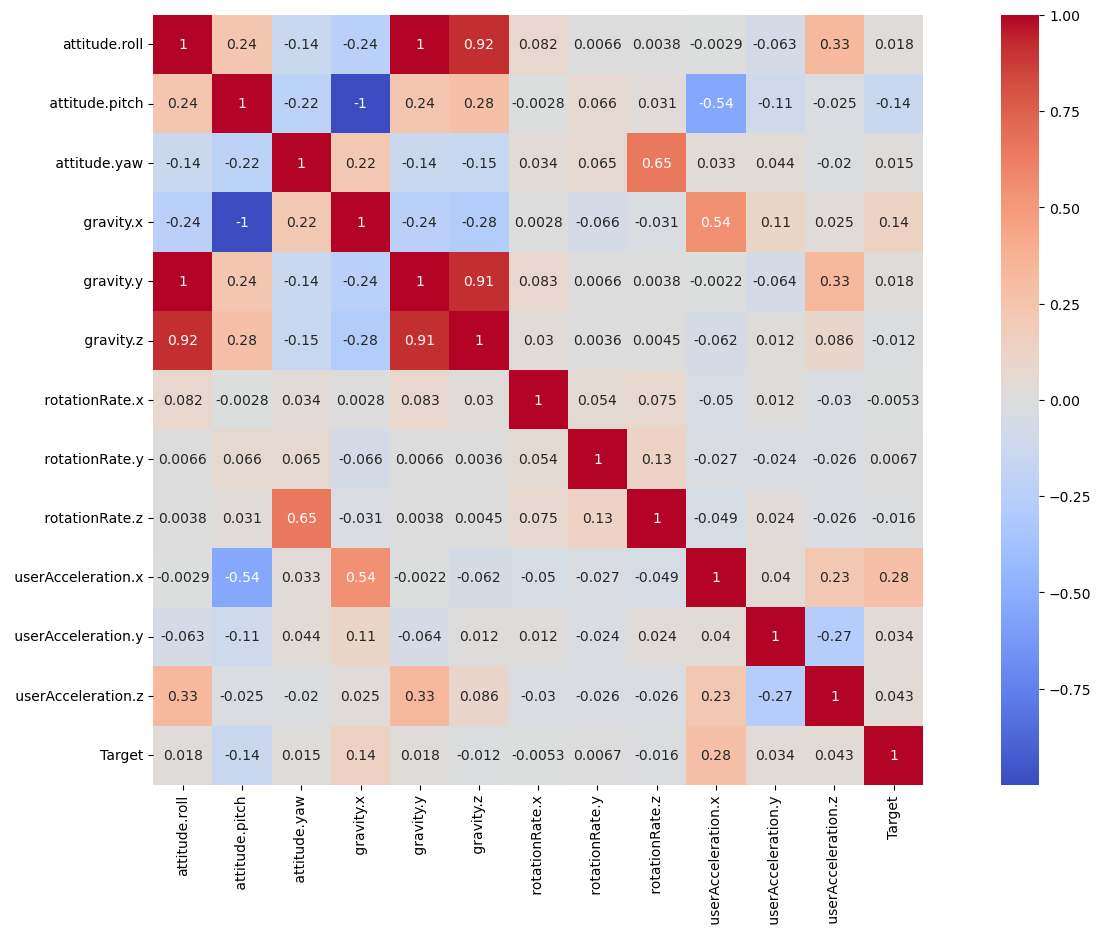

In [12]:
plt.figure(figsize = (20,10))

unsteady_corr = unsteady_df.corr()

axis_corr = sns.heatmap(unsteady_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [13]:
target_corr = unsteady_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.x    0.275671
 gravity.x             0.139154
 attitude.pitch        0.139038
 userAcceleration.z    0.043302
 userAcceleration.y    0.034071
 gravity.y             0.018193
attitude.roll          0.017825
 rotationRate.z        0.015589
 attitude.yaw          0.015222
 gravity.z             0.011544
 rotationRate.y        0.006662
 rotationRate.x        0.005330
Name: Target, dtype: float64


## Staircase Motion

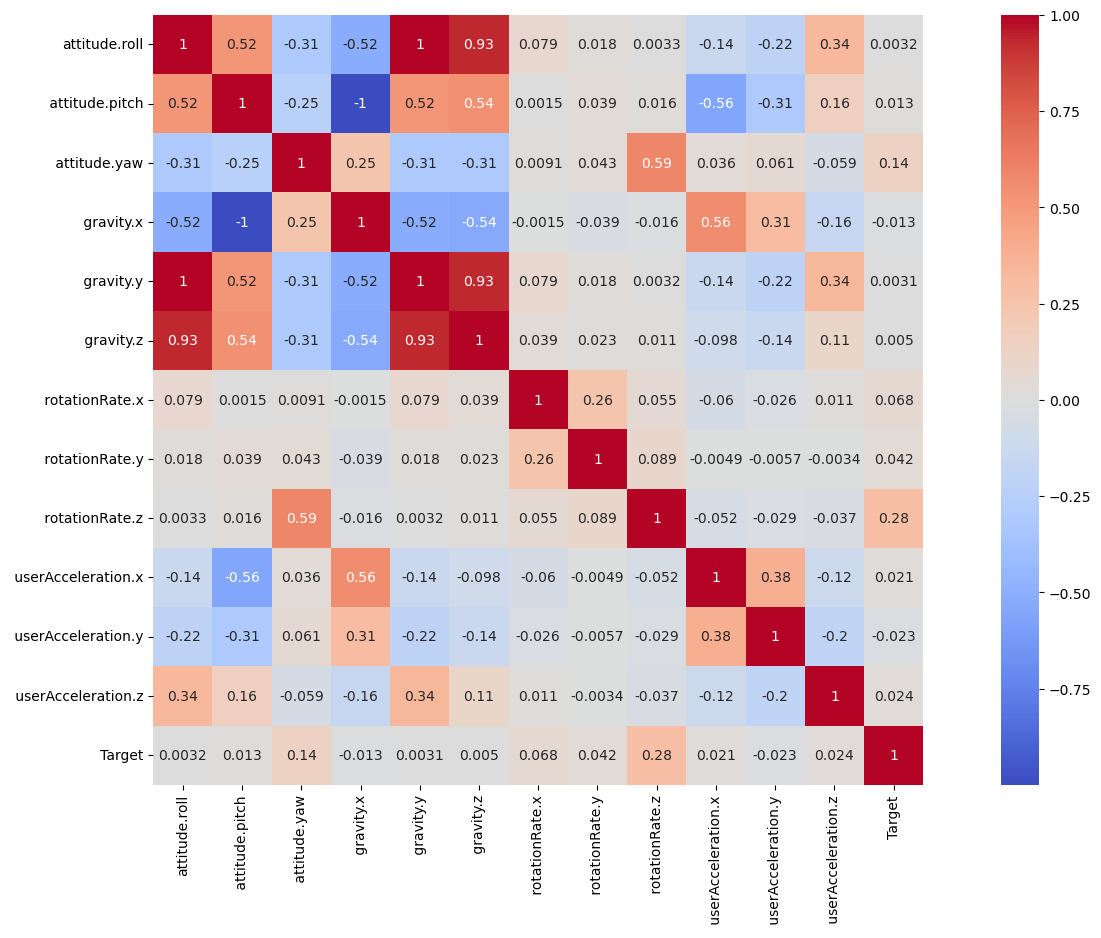

In [14]:
staircase_df  = imu_df[(imu_df['Target'] == 2) | (imu_df['Target'] == 3)]

plt.figure(figsize = (20,10))

staircase_corr = staircase_df.corr()

axis_corr = sns.heatmap(staircase_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [15]:
target_corr = staircase_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 rotationRate.z        0.284867
 attitude.yaw          0.136617
 rotationRate.x        0.068477
 rotationRate.y        0.042021
 userAcceleration.z    0.024205
 userAcceleration.y    0.023324
 userAcceleration.x    0.021166
 attitude.pitch        0.013377
 gravity.x             0.013307
 gravity.z             0.005010
attitude.roll          0.003164
 gravity.y             0.003095
Name: Target, dtype: float64


## Surface Motion

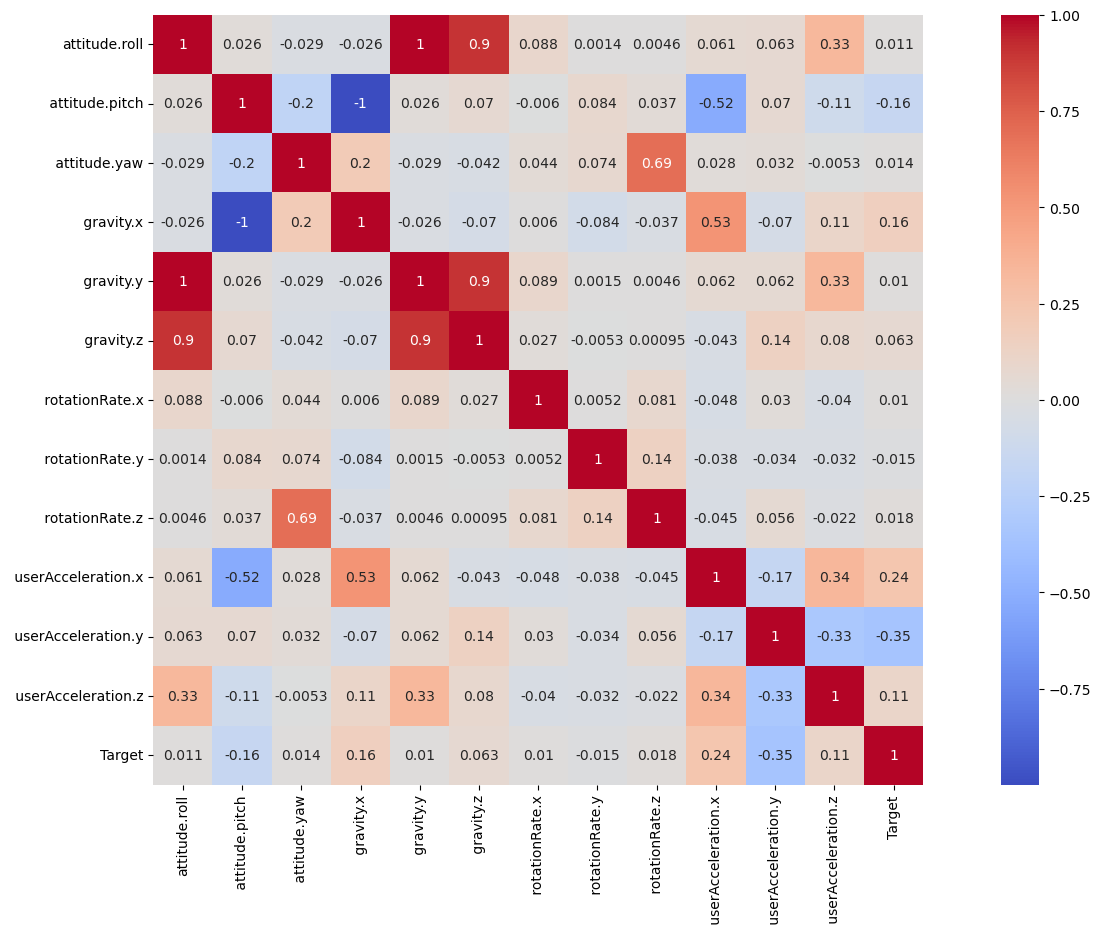

In [16]:
surface_df  = imu_df[(imu_df['Target'] == 0) | (imu_df['Target'] == 1)]

plt.figure(figsize = (20,10))

surface_corr = surface_df.corr()

axis_corr = sns.heatmap(surface_corr, annot= True,cmap="coolwarm",square=True)

plt.show()

In [17]:
target_corr = surface_corr['Target']
ranked_features = target_corr.abs().sort_values(ascending=False)

print(ranked_features)

Target                 1.000000
 userAcceleration.y    0.351724
 userAcceleration.x    0.241977
 gravity.x             0.159962
 attitude.pitch        0.159653
 userAcceleration.z    0.105744
 gravity.z             0.062563
 rotationRate.z        0.017580
 rotationRate.y        0.015467
 attitude.yaw          0.013592
attitude.roll          0.010848
 gravity.y             0.010269
 rotationRate.x        0.010055
Name: Target, dtype: float64
